# Exercise 1 
## 1) Use Canny edge detector, detect edges in four different images from your choice.

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function to load images from the desktop


In [44]:
def load_images_from_desktop(file_paths):
    images = []
    for path in file_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error loading image: {path}")
        else:
            images.append(img)
    return images


### Load images from desktop


In [45]:
# File paths to the images on the desktop
file_paths = [
    "Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg.webp",
    "JI230816Cosmos220-6d9254f-edited-scaled.webp",
    "Cristiano_Ronaldo,_2023.jpg",
    "Pagani-Huayra-Roadster-3.jpg"
]

# Load images from desktop
desktop_images = load_images_from_desktop(file_paths)


### Function to apply Canny edge detection

In [46]:
def process_images_with_canny(images):
    edge_results = []
    for img in images:
        # Apply Canny edge detection
        edges = cv2.Canny(img, 100, 200)
        edge_results.append(edges)
    return edge_results

### Process images with Canny edge detection


In [47]:
edges = process_images_with_canny(desktop_images)

### Plot desktop images and their edges


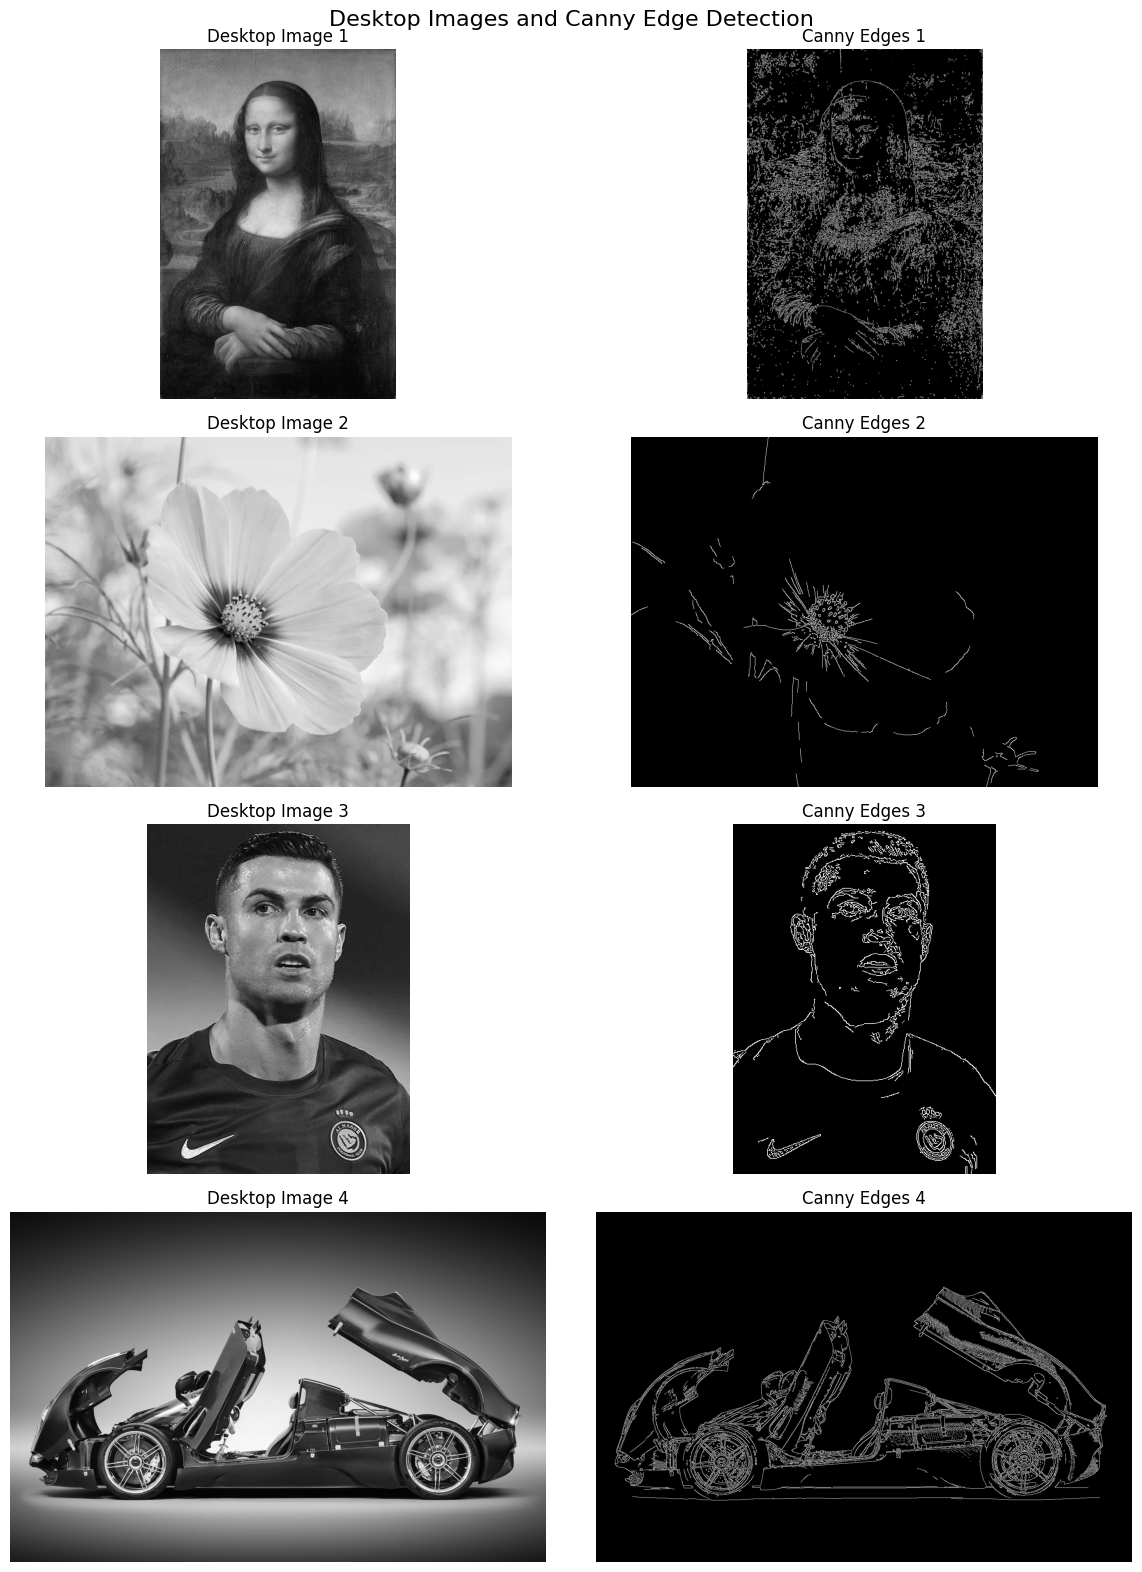

In [48]:
fig, axes = plt.subplots(len(desktop_images), 2, figsize=(12, 4 * len(desktop_images)))
fig.suptitle("Desktop Images and Canny Edge Detection", fontsize=16)

for i, (img, edge) in enumerate(zip(desktop_images, edges)):
    axes[i, 0].imshow(img, cmap='gray')
    axes[i, 0].set_title(f"Desktop Image {i+1}")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(edge, cmap='gray')
    axes[i, 1].set_title(f"Canny Edges {i+1}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

## 2)Implement the algorithm of histogram equalization

### Function to apply histogram equalization

In [49]:
def apply_histogram_equalization(images):
    equalized_results = []
    for img in images:
        equalized = cv2.equalizeHist(img)
        equalized_results.append(equalized)
    return equalized_results


### Apply histogram equalization


In [50]:
equalized_images = apply_histogram_equalization(desktop_images)

### Plot original and equalized images

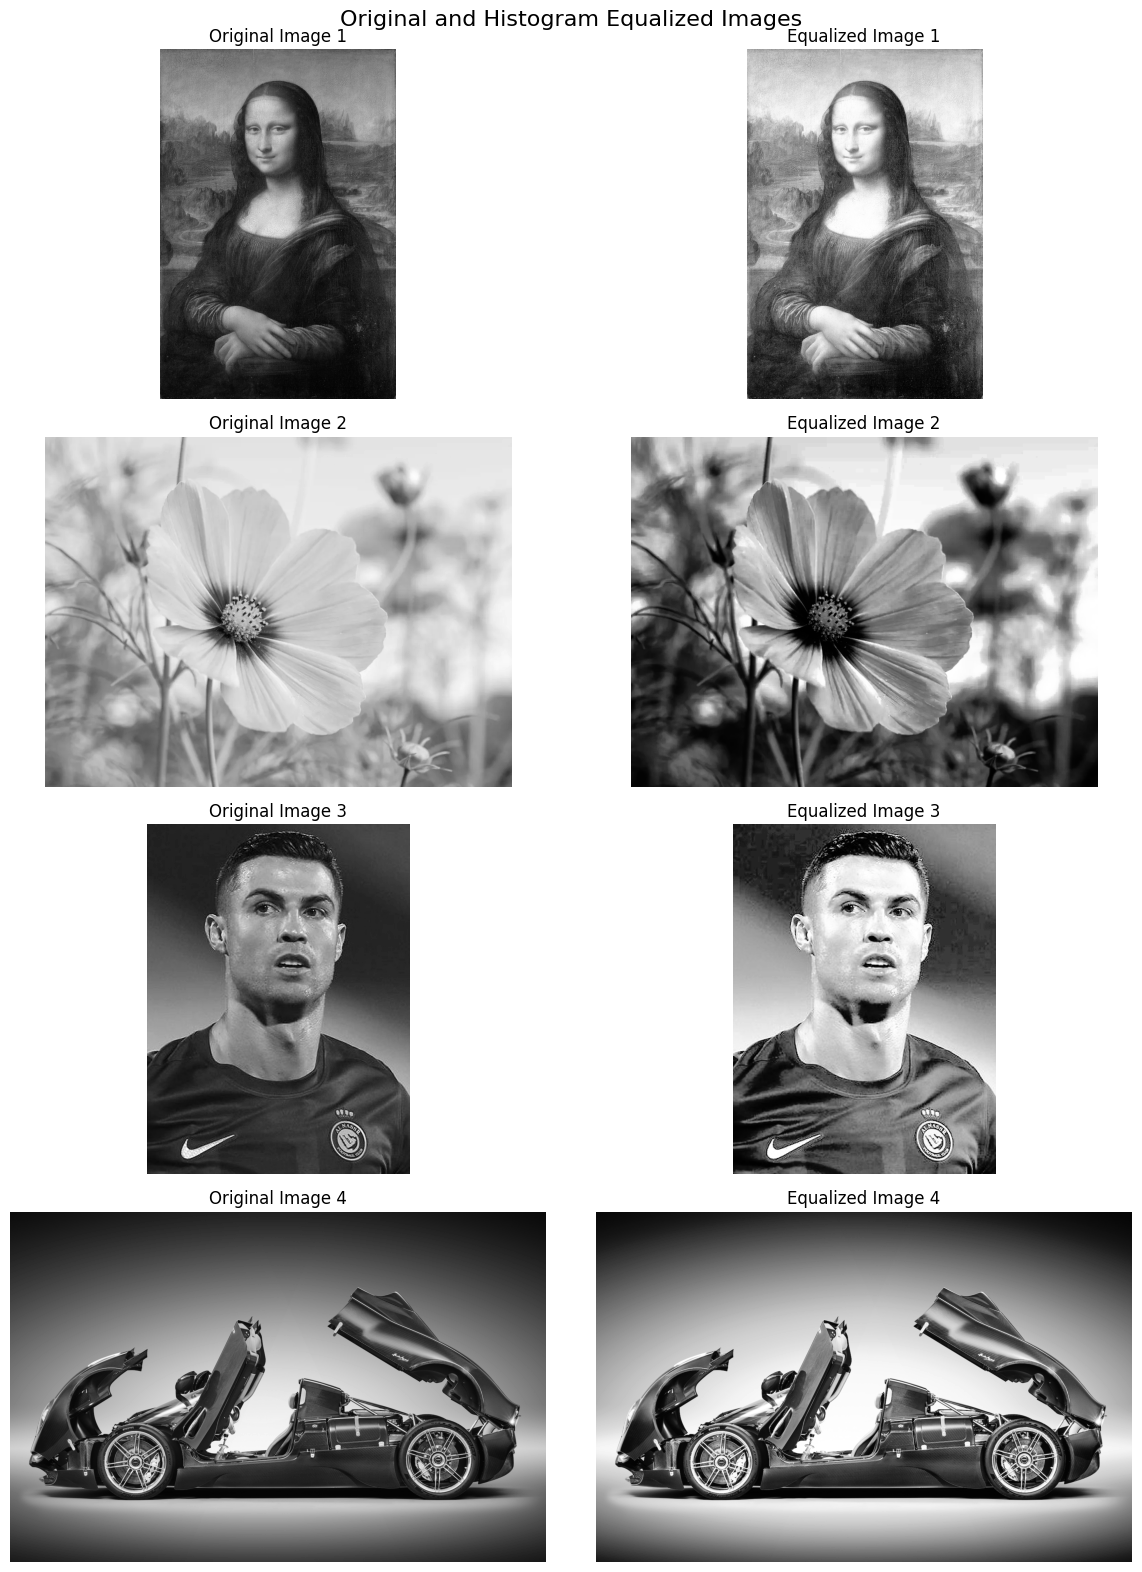

In [51]:
fig, axes = plt.subplots(len(desktop_images), 2, figsize=(12, 4 * len(desktop_images)))
fig.suptitle("Original and Histogram Equalized Images", fontsize=16)

for i, (original, equalized) in enumerate(zip(desktop_images, equalized_images)):
    axes[i, 0].imshow(original, cmap='gray')
    axes[i, 0].set_title(f"Original Image {i+1}")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(equalized, cmap='gray')
    axes[i, 1].set_title(f"Equalized Image {i+1}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

# Comments:
### Histogram equalization enhances the contrast of images by spreading out the intensity values.
### This is particularly useful for images with poor contrast, as it can reveal details that were previously obscured.
### In cases where the original image already has good contrast, the improvement may be minimal or unnecessary.


#  Exercise 2 

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10


### Load CIFAR-10 dataset


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Normalize the data


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### Convert class vectors to binary class matrices (one-hot encoding)


In [4]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

### Define the CNN model


In [5]:
def create_cnn_model():
    model = models.Sequential()
    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

### Compile the model


In [6]:
model = create_cnn_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model


In [7]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 7s 3ms/step - loss: 1.5745 - accuracy: 0.4220 - val_loss: 1.3974 - val_accuracy: 0.4953
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2273 - accuracy: 0.5644 - val_loss: 1.1511 - val_accuracy: 0.5943
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0693 - accuracy: 0.6237 - val_loss: 1.0359 - val_accuracy: 0.6415
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9638 - accuracy: 0.6635 - val_loss: 0.9611 - val_accuracy: 0.6657
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8842 - accuracy: 0.6923 - val_loss: 0.9648 - val_accuracy: 0.6653
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8222 - accuracy: 0.7121 - val_loss: 0.9487 - val_accuracy: 0.6765
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7683 - accuracy: 0.7341 - val_loss: 0.9108 - val_accuracy:

### Evaluate the model


In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy* 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.9419 - accuracy: 0.6966
Test accuracy: 69.66%


### Function to plot training history


In [9]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


### Plot training history


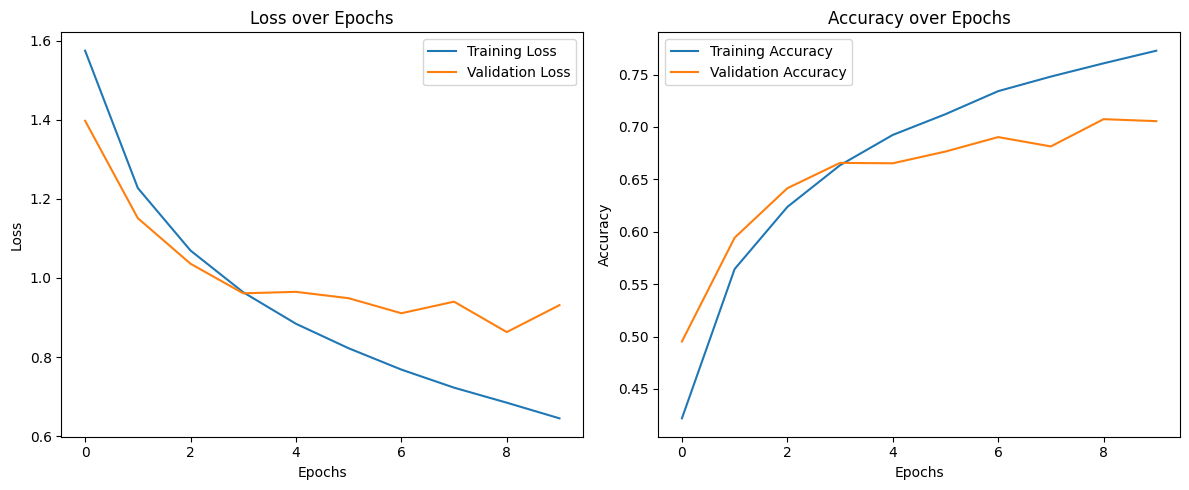

In [10]:
plot_training_history(history)

### Predict the classes for test set


In [76]:
# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_test_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels t

313/313 [==============================] - 0s 923us/step


### Plot the confusion matrix

<Figure size 1000x800 with 0 Axes>

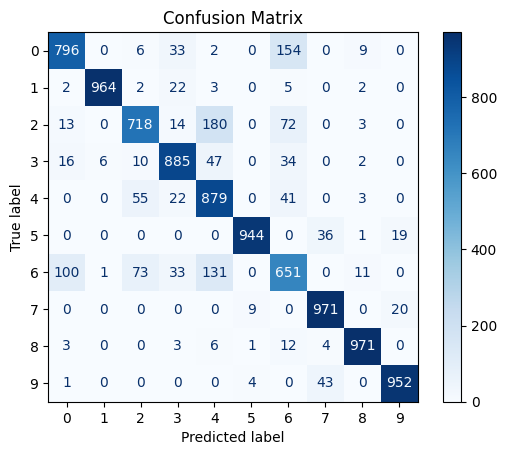

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Exercise 3 

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

### Create class_names list object for mapping labels to names

In [2]:
# Define class names for Fashion MNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Load the Fashion MNIST dataset


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

###  Data Exploration

In [4]:
 print('Training Images Dataset Shape: {}'.format(x_train.shape))
 print('No. of Training Images Dataset Labels: {}'.format(len(y_train)))
 print('Test Images Dataset Shape: {}'.format(x_test.shape))
 print('No. of Test Images Dataset Labels: {}'.format(len(y_test)))

Training Images Dataset Shape: (60000, 28, 28)
No. of Training Images Dataset Labels: 60000
Test Images Dataset Shape: (10000, 28, 28)
No. of Test Images Dataset Labels: 10000


### Data Visualization

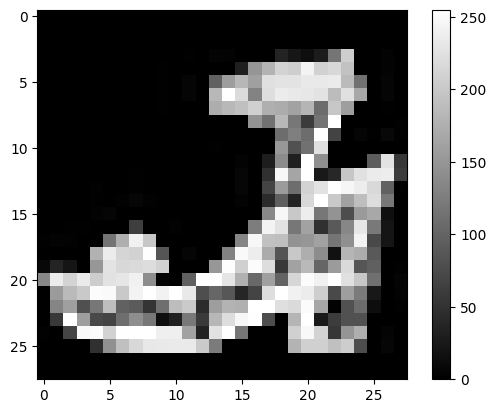

5
Sandal


In [5]:
# Display a sample image
index = 60
plt.figure()
plt.imshow(x_train[index], cmap='gray')
plt.colorbar()
plt.show()
print(y_train[index])
print(class_names[y_train[index]])

### Normalize the data


In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### Flatten the images for input into the neural network

In [7]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

### Convert class vectors to binary class matrices (one-hot encoding)

In [8]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

### Define the neural network model


In [9]:
def create_nn_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
    model.add(layers.Dropout(0.2))  # Add dropout to reduce overfitting
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

### Compile the model


In [10]:
model = create_nn_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


### Train the model


In [11]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5554 - accuracy: 0.7986 - val_loss: 0.4047 - val_accuracy: 0.8512
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4133 - accuracy: 0.8477 - val_loss: 0.3775 - val_accuracy: 0.8633
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3765 - accuracy: 0.8596 - val_loss: 0.3588 - val_accuracy: 0.8727
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3534 - accuracy: 0.8698 - val_loss: 0.3509 - val_accuracy: 0.8736
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3370 - accuracy: 0.8746 - val_loss: 0.3483 - val_accuracy: 0.8756
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3242 - accuracy: 0.8802 - val_loss: 0.3346 - val_accuracy: 0.8776
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3140 - accuracy: 0.8829 - val_loss: 0.3371 - val_accuracy:

### Evaluate the model


In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy* 100:.2f}%")

313/313 - 0s - loss: 0.3471 - accuracy: 0.8745 - 486ms/epoch - 2ms/step
Test accuracy: 87.45%


### Function to plot training history


In [13]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Plot training history


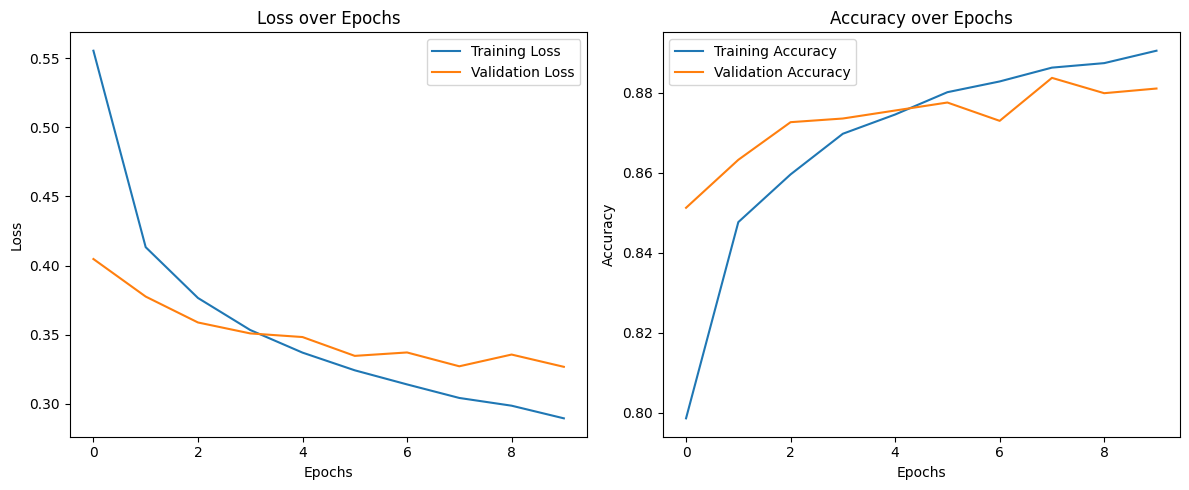

In [14]:
plot_training_history(history)

### Predict the classes for test set


In [17]:
import numpy as np

y_pred_n = model.predict(x_test)
y_pred_classes_n = np.argmax(y_pred_n, axis=1)  # Convert probabilities to class labels
y_test_classes_n = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels t

313/313 [==============================] - 0s 1ms/step


### Plot the confusion matrix


<Figure size 1000x800 with 0 Axes>

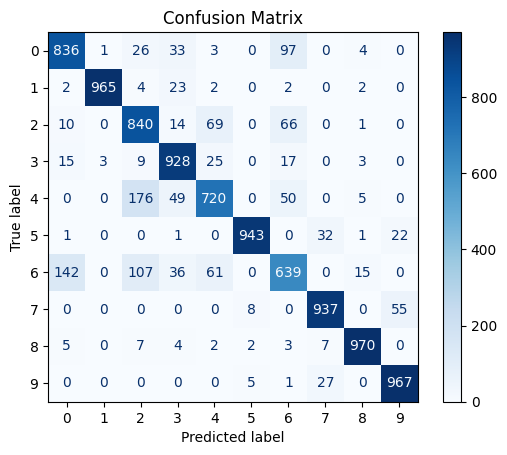

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes_n, y_pred_classes_n)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()